In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon_alexa.tsv to amazon_alexa (2).tsv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df["rating"].value_counts()

,count
rating,
5,2286
4,455
1,161
3,152
2,96


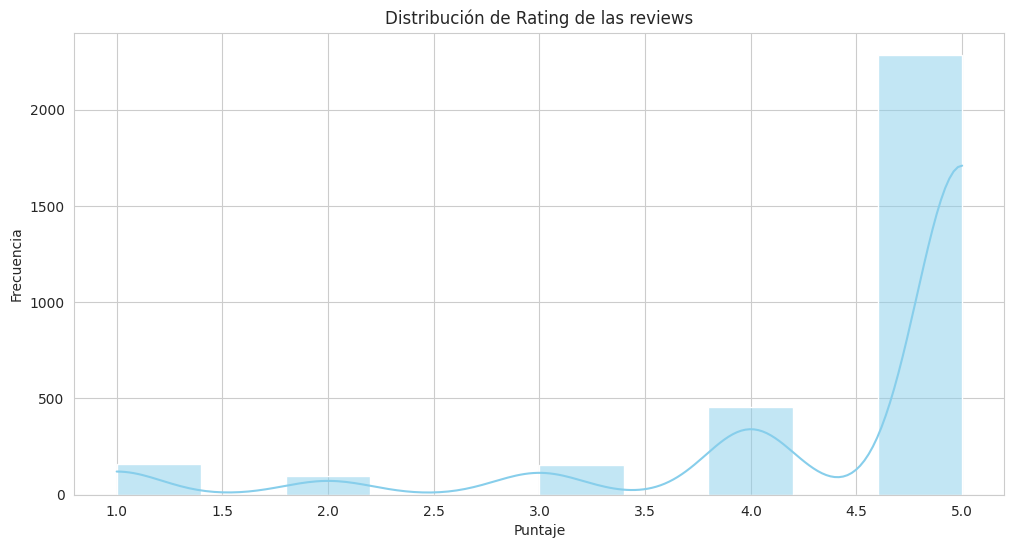

In [ ]:
# Configuración de estilo
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Histograma de la distribución de edades
sns.histplot(df["rating"], bins=10, kde=True, color="skyblue")
plt.title("Distribución de Rating de las reviews")
plt.xlabel("Puntaje")
plt.ylabel("Frecuencia")
plt.show()

<ipython-input-74-8e07995fcedb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='variation', palette="viridis")


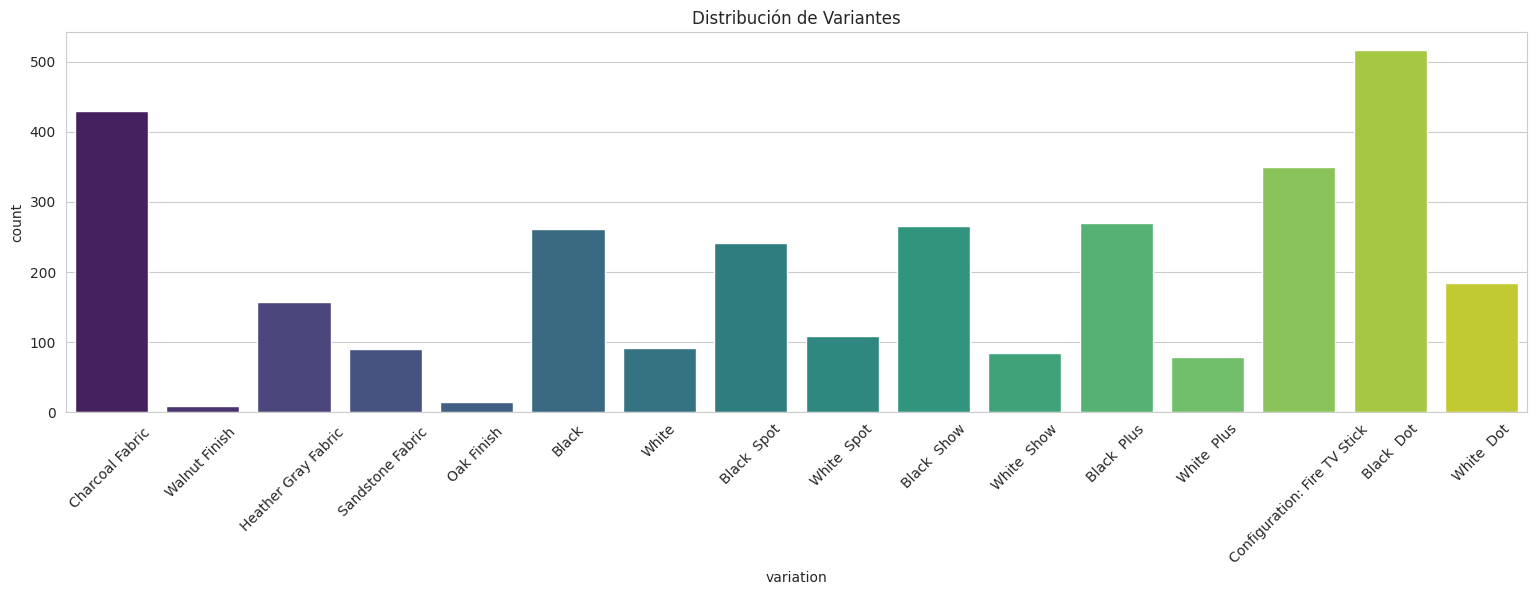

In [ ]:
plt.figure(figsize=(45, 10))
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='variation', palette="viridis")
plt.title(f"Distribución de Variantes")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Preprocesamiento de texto Convertir a minúsculas
- Eliminar signos de puntuación y caracteres especiales
- Eliminar stopwords (palabras sin valor informativo como "the", "of", "a")
- Tokenización (separar palabras)
- Lematización (reducir palabras a su forma raíz, por ejemplo, "running" → "run")

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Descargar recursos de nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Inicializar lematizador
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [ ]:
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    words = word_tokenize(text)  # Tokenización
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Eliminar stopwords y lematizar
    return " ".join(words)

In [ ]:

# Reemplazar NaN por cadena vacía y convertir todo a string
df["verified_reviews"] = df["verified_reviews"].fillna("").astype(str)

# Aplicar limpieza a la columna de texto
df["cleaned_text"] = df["verified_reviews"].apply(clean_text)

# Mostrar primeros resultados
print(df[["verified_reviews", "cleaned_text"]].head())

                                    verified_reviews  \
0                                      Love my Echo!   
1                                          Loved it!   
2  Sometimes while playing a game, you can answer...   
3  I have had a lot of fun with this thing. My 4 ...   
4                                              Music   

                                        cleaned_text  
0                                          love echo  
1                                              loved  
2  sometimes playing game answer question correct...  
3  lot fun thing 4 yr old learns dinosaur control...  
4                                              music  


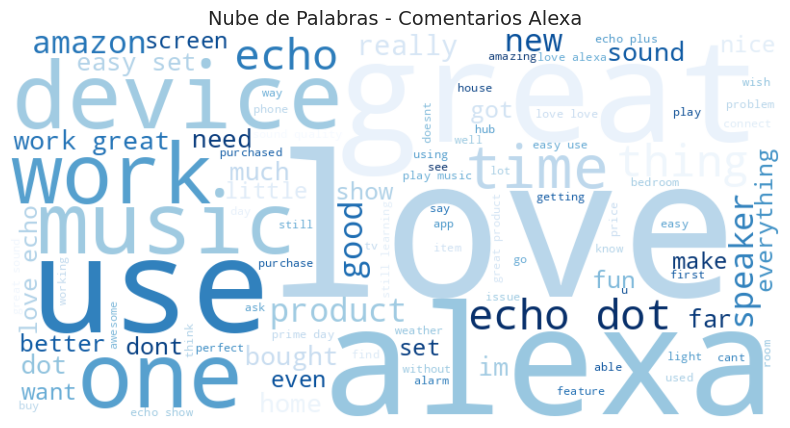

In [ ]:
from wordcloud import WordCloud

# Unir todos los comentarios en un solo texto
text = " ".join(df["cleaned_text"])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Blues", max_words=100).generate(text)

# Mostrar el gráfico
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Ocultar ejes
plt.title("Nube de Palabras - Comentarios Alexa", fontsize=14)
plt.show()

Analisis de Sentimientos

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar diccionario de VADER
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Inicializar el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

In [ ]:
# Aplicar análisis de sentimiento
df["sentiment_score"] = df["cleaned_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Definir categoría de sentimiento
df["sentiment"] = df["sentiment_score"].apply(lambda x: "positivo" if x > 0.05 else ("negativo" if x < -0.05 else "neutral"))

# Mostrar ejemplos
print(df[["cleaned_text", "sentiment_score", "sentiment"]].head())

                                        cleaned_text  sentiment_score  \
0                                          love echo           0.6369   
1                                              loved           0.5994   
2  sometimes playing game answer question correct...           0.0516   
3  lot fun thing 4 yr old learns dinosaur control...           0.9169   
4                                              music           0.0000   

  sentiment  
0  positivo  
1  positivo  
2  positivo  
3  positivo  
4   neutral  


Vectorizacion de texto

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir texto en matriz TF-IDF
vectorizer = TfidfVectorizer(max_features=500)  # Máximo 500 palabras más relevantes
X = vectorizer.fit_transform(df["cleaned_text"])

# Mostrar tamaño de la matriz
print(X.shape)

(3150, 500)


Entrenamos modelo de clasificacion

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Convertir sentimiento a valores numéricos (positivo=1, negativo=0)
df["sentiment_label"] = df["sentiment"].apply(lambda x: 1 if x == "positivo" else 0)

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, df["sentiment_label"], test_size=0.2, random_state=42)

In [ ]:
# Entrenar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluar modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9063492063492063
              precision    recall  f1-score   support

           0       0.87      0.51      0.64       104
           1       0.91      0.98      0.95       526

    accuracy                           0.91       630
   macro avg       0.89      0.75      0.79       630
weighted avg       0.90      0.91      0.90       630



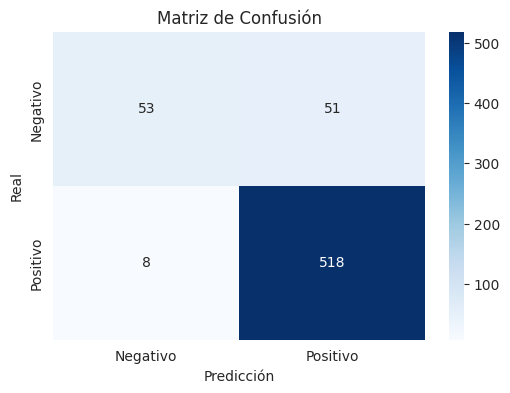

In [ ]:
from sklearn.metrics import confusion_matrix
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)

# Crear gráfico de calor con seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])

# Etiquetas
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

PAra balancear y disminuir el error usamos SMOTE que creara datos sinteticos par ala clase minoritaria

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Ver la distribución original
print("Distribución original:", Counter(y_train))

Distribución original: Counter({1: 2094, 0: 426})


In [ ]:
# Aplicar SMOTE solo en los datos de entrenamiento
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Ver la distribución después del balanceo
print("Distribución después de SMOTE:", Counter(y_train_balanced))

Distribución después de SMOTE: Counter({1: 2094, 0: 2094})


volvemos a entrenar

In [ ]:

# Entrenar modelo
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)
# Hacer predicciones
y_pred = model.predict(X_test)
# Evaluar modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9063492063492063
              precision    recall  f1-score   support

           0       0.67      0.87      0.75       104
           1       0.97      0.91      0.94       526

    accuracy                           0.91       630
   macro avg       0.82      0.89      0.85       630
weighted avg       0.92      0.91      0.91       630



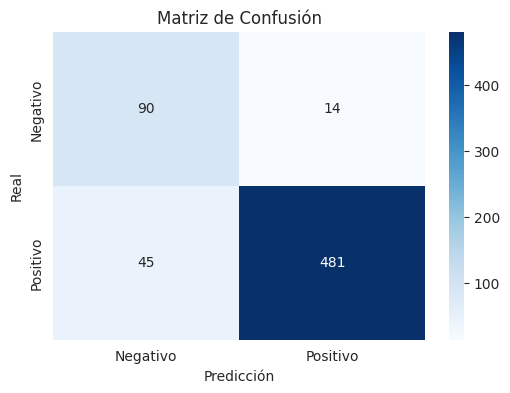

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)

# Crear gráfico de calor con seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])

# Etiquetas
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

Probamos el modelo con comentarios nuevos

In [ ]:
def predict_sentiment(review):
    review_cleaned = clean_text(review)
    review_vectorized = vectorizer.transform([review_cleaned])
    prediction = model.predict(review_vectorized)[0]
    return "Positivo" if prediction == 1 else "Negativo"

# Ejemplo de prueba
new_review = "I love this product! It's amazing."
print(predict_sentiment(new_review))

Positivo
